In [6]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
df = pd.read_csv('Dataset_Child.csv')

In [11]:
df

,Child_ID,Age,Daily_Screen_Time_Hours,Preferred_Activity,Device_Dependency_Score,Emotional_Response_To_No_Device,Parental_Control_Strictness,Impact_on_Academics,Impact_on_Sleep,Physical_Activity_Level,...,Emotional_Regulation_Use,Parental_Monitoring_Level,Gender,Teacher_Feedback,Participation_in_Extracurricular_Activities,Parental_Involvement_in_Education,Peer_Relationship_Quality,Stress_Levels,Favorite_Subject,Hours_of_Sleep
0,Child_3531,11.0,5.7,YouTube Kids,10.0,Irritable,3.0,Positive,Neutral,Moderate,...,Occasional,High,Female,Student's high screen time is impacting classr...,Low,Low,Poor,Moderate,Literature,5.3
1,Child_3675,NaN,1.8,Edu Apps,6.0,Irritable,NaN,NaN,Improved,loww,...,Rare,Moderate,unknown,Student is performing well in class and demons...,NaN,NaN,Good,Low,Physical Education,5.4
2,Child_1295,12.0,3.5,Video Watching,8.0,Unbothered,4.0,NaN,Neutral,HIGH,...,Rare,Moderate,Male,Student is maintaining a satisfactory performa...,High,High,Poor,Moderate,Art,5.7
3,Child_316,10.0,0.8,Gamee,10.0,Distressed,1.0,NaN,Improved,moderate,...,Frequent,Moderate,malee,Student is performing well in class and demons...,Low,NaN,Poor,High,Math,9.2
4,NaN,6.0,4.6,Gamee,1.0,Unbothered,3.0,HIGH,Disrupted,NaN,...,Rare,High,femaale,Student's high screen time is impacting classr...,Low,NaN,Average,Moderate,Literature,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4199,Child_1659,5.0,3.9,Gaming,4.0,Unbothered,4.0,Positive,Disrupted,High,...,NaN,Moderate,Female,Student is maintaining a satisfactory performa...,High,NaN,Excellent,High,Art,5.2
4200,Child_1914,7.0,1.6,Video Watching,5.0,Irritable,3.0,NaN,Disrupted,NaN,...,Occasional,Moderate,NaN,Student is performing well in class and demons...,High,Moderate,Poor,Low,Art,9.0
4201,Child_2194,9.0,NaN,Video Watching,2.0,Irritable,2.0,Negative,NaN,High,...,Frequent,Moderate,Male,No feedback provided due to missing data.,NaN,Low,Good,High,Science,6.7
4202,Child_2949,7.0,16.0,Video-Watching,8.0,Irritable,3.0,loww,Disrupted,HIGH,...,Occasional,Moderate,malee,Student's high screen time is impacting classr...,Low,Moderate,Good,High,Literature,6.1


In [12]:
df = df[(df['Age'].isna()) | ((df['Age'] >= 3) & (df['Age'] <= 12))]

In [13]:
df = df[(df['Daily_Screen_Time_Hours'].isna()) | ((df['Daily_Screen_Time_Hours'] >= 0) & (df['Daily_Screen_Time_Hours'] <= 21))]
df['Daily_Screen_Time_Hours'] = df['Daily_Screen_Time_Hours'].apply(lambda x: round(x, 1) if pd.notnull(x) else x)

In [14]:
df['Preferred_Activity'] = df['Preferred_Activity'].apply(lambda x: str(x).strip().title().replace("-", " ") if pd.notnull(x) else x)
df['Preferred_Activity'] = df['Preferred_Activity'].apply(lambda x: str(x).strip().replace("-", " ") if pd.notnull(x) else x)
df['Preferred_Activity'] = df['Preferred_Activity'].replace({'Gamee': 'Gaming', 'YouTubeKid': 'YouTubeKids' , 'Youtubekid' : 'YouTubeKids','Edu Apps' :'Educational Apps'})

In [15]:
df['Preferred_Activity'] = df['Preferred_Activity'].replace({'YouTubeKids': 'Youtube Kids'})

In [16]:
df['Emotional_Response_To_No_Device'] = df['Emotional_Response_To_No_Device'].str.strip()
df['Emotional_Response_To_No_Device'] = df['Emotional_Response_To_No_Device'].astype(str)

In [17]:
df['Impact_on_Academics'] = df['Impact_on_Academics'].astype(str)
df['Impact_on_Academics'] = df['Impact_on_Academics'].str.lower()

In [18]:
df['Impact_on_Academics'] = df['Impact_on_Academics'].replace({
    'positivee': 'positive',
    'positiv': 'positive',
    'Negative': 'negative',
    'negativee': 'negative',
    'moderatee': 'moderate',
    'loww': 'low'
})
df['Emotional_Response_To_No_Device'] = df['Emotional_Response_To_No_Device'].astype(str)

In [19]:
df['Impact_on_Academics'] = df['Impact_on_Academics'].replace({
    'negative': 'low',
    'neutral': 'moderate',
    'positive': 'high',
})

In [20]:
df['Impact_on_Sleep'] = df['Impact_on_Sleep'].astype(str)
df['Impact_on_Sleep'] = df['Impact_on_Sleep'].str.strip()

In [21]:
df['Physical_Activity_Level'] = df['Physical_Activity_Level'].astype(str)
df['Physical_Activity_Level'] = df['Physical_Activity_Level'].str.strip()

In [22]:
df['Physical_Activity_Level'] = df['Physical_Activity_Level'].replace({
    'positiv': 'positive',
    'negativee': 'negative',
    'loww': 'low' ,
    'HIGH': 'High',
    'MODERATE': 'Moderate',
    'moderate' : 'Moderate' ,
    'LOW': 'low' ,
    'Low': 'low'

})

In [23]:
df['Physical_Activity_Level'] = df['Physical_Activity_Level'].replace({
    'negative': 'low',
    'positive': 'High',
})

In [24]:
df['Social_Interactions_Preference'] = (
    df['Social_Interactions_Preference'].astype(str) .str.lower() .map({
        'balance': 'Balanced',
        'balanced': 'Balanced',
        'offline': 'Offline',
        'offliine': 'Offline',
        'online': 'Online',
        'onliine': 'Online'
    }).fillna(df['Social_Interactions_Preference'])
)

In [25]:
df["Parent_Screen_Time_Habits"] = df["Parent_Screen_Time_Habits"].replace("#VALUE!", np.nan)

In [26]:
df['Sibling_Influence'] = df['Sibling_Influence'].astype(str)
df['Parent_Screen_Time_Habits'] = df['Parent_Screen_Time_Habits'].astype(str)
df['Cognitive_Impact'] = df['Cognitive_Impact'].astype(str)
df['Emotional_Regulation_Use'] = df['Emotional_Regulation_Use'].astype(str)

df['Sibling_Influence'] = df['Sibling_Influence'].str.strip()
df['Parent_Screen_Time_Habits'] = df['Parent_Screen_Time_Habits'].str.strip()
df['Cognitive_Impact'] = df['Cognitive_Impact'].str.strip()
df['Emotional_Regulation_Use'] = df['Emotional_Regulation_Use'].str.strip()

df['Sibling_Influence'] = df['Sibling_Influence'].str.lower()
df['Parent_Screen_Time_Habits'] = df['Parent_Screen_Time_Habits'].str.lower()
df['Cognitive_Impact'] = df['Cognitive_Impact'].str.lower()
df['Emotional_Regulation_Use'] = df['Emotional_Regulation_Use'].str.lower()

In [27]:
df['Gender'] = df['Gender'].replace({'malee': 'Male', 'femaale': 'Female', 'F': 'Female','unknown': np.nan})

In [28]:
df['Teacher_Feedback'] = df['Teacher_Feedback'].replace({'isufigifgb  fiuewhfwef': np.nan})

In [29]:
df['Participation_in_Extracurricular_Activities'] = df['Participation_in_Extracurricular_Activities'].str.strip()
df['Participation_in_Extracurricular_Activities'] = df['Participation_in_Extracurricular_Activities'].str.lower()
df['Participation_in_Extracurricular_Activities'] = df['Participation_in_Extracurricular_Activities'].replace({'None' : None})

In [30]:
df['Parental_Involvement_in_Education'] = df['Parental_Involvement_in_Education'].str.strip()
df['Parental_Involvement_in_Education'] = df['Parental_Involvement_in_Education'].str.lower()
df['Parental_Involvement_in_Education'] = df['Parental_Involvement_in_Education'].replace({'None' : None})

In [31]:
df['Peer_Relationship_Quality'] = df['Peer_Relationship_Quality'].str.strip()
df['Peer_Relationship_Quality'] = df['Peer_Relationship_Quality'].str.lower()

df['Stress_Levels'] = df['Stress_Levels'].str.strip()
df['Stress_Levels'] = df['Stress_Levels'].str.lower()

df['Favorite_Subject'] = df['Favorite_Subject'].str.strip()
df['Favorite_Subject'] = df['Favorite_Subject'].str.lower()

In [32]:
df

,Child_ID,Age,Daily_Screen_Time_Hours,Preferred_Activity,Device_Dependency_Score,Emotional_Response_To_No_Device,Parental_Control_Strictness,Impact_on_Academics,Impact_on_Sleep,Physical_Activity_Level,...,Emotional_Regulation_Use,Parental_Monitoring_Level,Gender,Teacher_Feedback,Participation_in_Extracurricular_Activities,Parental_Involvement_in_Education,Peer_Relationship_Quality,Stress_Levels,Favorite_Subject,Hours_of_Sleep
0,Child_3531,11.0,5.7,Youtube Kids,10.0,Irritable,3.0,high,Neutral,Moderate,...,occasional,High,Female,Student's high screen time is impacting classr...,low,low,poor,moderate,literature,5.3
1,Child_3675,NaN,1.8,Educational Apps,6.0,Irritable,NaN,nan,Improved,low,...,rare,Moderate,NaN,Student is performing well in class and demons...,NaN,NaN,good,low,physical education,5.4
2,Child_1295,12.0,3.5,Video Watching,8.0,Unbothered,4.0,nan,Neutral,High,...,rare,Moderate,Male,Student is maintaining a satisfactory performa...,high,high,poor,moderate,art,5.7
3,Child_316,10.0,0.8,Gaming,10.0,Distressed,1.0,nan,Improved,Moderate,...,frequent,Moderate,Male,Student is performing well in class and demons...,low,NaN,poor,high,math,9.2
4,NaN,6.0,4.6,Gaming,1.0,Unbothered,3.0,high,Disrupted,nan,...,rare,High,Female,Student's high screen time is impacting classr...,low,NaN,average,moderate,literature,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4199,Child_1659,5.0,3.9,Gaming,4.0,Unbothered,4.0,high,Disrupted,High,...,nan,Moderate,Female,Student is maintaining a satisfactory performa...,high,NaN,excellent,high,art,5.2
4200,Child_1914,7.0,1.6,Video Watching,5.0,Irritable,3.0,nan,Disrupted,nan,...,occasional,Moderate,NaN,Student is performing well in class and demons...,high,moderate,poor,low,art,9.0
4201,Child_2194,9.0,NaN,Video Watching,2.0,Irritable,2.0,low,nan,High,...,frequent,Moderate,Male,No feedback provided due to missing data.,NaN,low,good,high,science,6.7
4202,Child_2949,7.0,16.0,Video Watching,8.0,Irritable,3.0,low,Disrupted,High,...,occasional,Moderate,Male,Student's high screen time is impacting classr...,low,moderate,good,high,literature,6.1


In [33]:
encoder = LabelEncoder()

df['Preferred_Activity'] = encoder.fit_transform(df['Preferred_Activity'])

print(df['Preferred_Activity'])

0       3
1       0
2       2
3       1
4       1
       ..
4199    1
4200    2
4201    2
4202    2
4203    4
Name: Preferred_Activity, Length: 4134, dtype: int64


In [34]:
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

print(label_mapping)

{'Educational Apps': np.int64(0), 'Gaming': np.int64(1), 'Video Watching': np.int64(2), 'Youtube Kids': np.int64(3), nan: np.int64(4)}


In [35]:
encoder = LabelEncoder()

df['Emotional_Response_To_No_Device'] = encoder.fit_transform(df['Emotional_Response_To_No_Device'])

print(df['Emotional_Response_To_No_Device'])

0       1
1       1
2       3
3       0
4       3
       ..
4199    3
4200    1
4201    1
4202    1
4203    2
Name: Emotional_Response_To_No_Device, Length: 4134, dtype: int64


In [36]:
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

print(label_mapping)

{'Distressed': np.int64(0), 'Irritable': np.int64(1), 'Neutral': np.int64(2), 'Unbothered': np.int64(3), 'nan': np.int64(4)}


In [37]:
encoder = LabelEncoder()

df['Impact_on_Academics'] = encoder.fit_transform(df['Impact_on_Academics'])

print(df['Impact_on_Academics'])

0       0
1       3
2       3
3       3
4       0
       ..
4199    0
4200    3
4201    1
4202    1
4203    3
Name: Impact_on_Academics, Length: 4134, dtype: int64


In [38]:
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

print(label_mapping)

{'high': np.int64(0), 'low': np.int64(1), 'moderate': np.int64(2), 'nan': np.int64(3)}


In [39]:
encoder = LabelEncoder()

df['Impact_on_Sleep'] = encoder.fit_transform(df['Impact_on_Sleep'])

print(df['Impact_on_Sleep'])

0       2
1       1
2       2
3       1
4       0
       ..
4199    0
4200    0
4201    3
4202    0
4203    0
Name: Impact_on_Sleep, Length: 4134, dtype: int64


In [40]:
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

print(label_mapping)

{'Disrupted': np.int64(0), 'Improved': np.int64(1), 'Neutral': np.int64(2), 'nan': np.int64(3)}


In [41]:
encoder = LabelEncoder()

df['Physical_Activity_Level'] = encoder.fit_transform(df['Physical_Activity_Level'])

print(df['Physical_Activity_Level'])

0       1
1       2
2       0
3       1
4       3
       ..
4199    0
4200    3
4201    0
4202    0
4203    2
Name: Physical_Activity_Level, Length: 4134, dtype: int64


In [42]:
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

print(label_mapping)

{'High': np.int64(0), 'Moderate': np.int64(1), 'low': np.int64(2), 'nan': np.int64(3)}


In [43]:
encoder = LabelEncoder()

df['Social_Interactions_Preference'] = encoder.fit_transform(df['Social_Interactions_Preference'])

print(df['Social_Interactions_Preference'])

0       1
1       2
2       1
3       3
4       3
       ..
4199    3
4200    1
4201    0
4202    1
4203    3
Name: Social_Interactions_Preference, Length: 4134, dtype: int64


In [44]:
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

print(label_mapping)

{'Balanced': np.int64(0), 'Offline': np.int64(1), 'Online': np.int64(2), nan: np.int64(3)}


In [45]:
columns_to_encode = [
    "Parent_Screen_Time_Habits",
    "Sibling_Influence",
    "Cognitive_Impact",
    "Emotional_Regulation_Use",
    "Parental_Monitoring_Level",
    "Gender",
    "Teacher_Feedback",
    "Participation_in_Extracurricular_Activities",
    "Parental_Involvement_in_Education",
    "Peer_Relationship_Quality",
    "Stress_Levels",
    "Favorite_Subject"
]

label_mappings = {}

for col in columns_to_encode:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    print(f"Label mapping for {col}:\n", label_mappings[col], "\n")

Label mapping for Parent_Screen_Time_Habits:
 {'high': np.int64(0), 'low': np.int64(1), 'moderate': np.int64(2), 'nan': np.int64(3)} 

Label mapping for Sibling_Influence:
 {'nan': np.int64(0), 'negative': np.int64(1), 'neutral': np.int64(2), 'positive': np.int64(3)} 

Label mapping for Cognitive_Impact:
 {'declined': np.int64(0), 'improved': np.int64(1), 'nan': np.int64(2), 'neutral': np.int64(3)} 

Label mapping for Emotional_Regulation_Use:
 {'frequent': np.int64(0), 'nan': np.int64(1), 'occasional': np.int64(2), 'rare': np.int64(3)} 

Label mapping for Parental_Monitoring_Level:
 {'High': np.int64(0), 'Low': np.int64(1), 'Moderate': np.int64(2), nan: np.int64(3)} 

Label mapping for Gender:
 {'Female': np.int64(0), 'Male': np.int64(1), nan: np.int64(2)} 

Label mapping for Teacher_Feedback:
 {'No feedback provided due to missing data.': np.int64(0), 'Student is maintaining a satisfactory performance in class but shows room for improvement in creativity. Moderate screen time could b

In [46]:
df.fillna({'Child_ID': "Unknown"}, inplace=True)

In [47]:
df['Age'] = df['Age'].fillna(df.groupby('Social_Interactions_Preference')['Age'].transform('median'))

In [48]:
print(df['Age'].isnull().sum())

0


In [49]:
df['Daily_Screen_Time_Hours'] = df['Daily_Screen_Time_Hours'].fillna(
    df.groupby('Teacher_Feedback')['Daily_Screen_Time_Hours'].transform('mean')
)
df['Daily_Screen_Time_Hours'] = df['Daily_Screen_Time_Hours'].fillna(df['Daily_Screen_Time_Hours'].mean())

missing_values = df['Daily_Screen_Time_Hours'].isna().sum()
print("Remaining missing values:", missing_values)

Remaining missing values: 0


In [50]:
print(df['Daily_Screen_Time_Hours'].isnull().sum())

0


In [51]:
mode_value = df[df['Preferred_Activity'] != 4]['Preferred_Activity'].mode()[0]
df['Preferred_Activity'] = df['Preferred_Activity'].replace(4, mode_value)
df['Preferred_Activity'] = df['Preferred_Activity'].replace(4, np.nan)  
df['Preferred_Activity'] = df['Preferred_Activity'].fillna(df['Preferred_Activity'].mode()[0])

In [52]:
print(df['Preferred_Activity'].unique())

[3 0 2 1]


In [53]:
df

,Child_ID,Age,Daily_Screen_Time_Hours,Preferred_Activity,Device_Dependency_Score,Emotional_Response_To_No_Device,Parental_Control_Strictness,Impact_on_Academics,Impact_on_Sleep,Physical_Activity_Level,...,Emotional_Regulation_Use,Parental_Monitoring_Level,Gender,Teacher_Feedback,Participation_in_Extracurricular_Activities,Parental_Involvement_in_Education,Peer_Relationship_Quality,Stress_Levels,Favorite_Subject,Hours_of_Sleep
0,Child_3531,11.0,5.700000,3,10.0,1,3.0,0,2,1,...,2,0,0,3,1,1,3,2,1,5.3
1,Child_3675,8.0,1.800000,0,6.0,1,NaN,3,1,2,...,3,2,2,2,3,3,2,1,3,5.4
2,Child_1295,12.0,3.500000,2,8.0,3,4.0,3,2,0,...,3,2,1,1,0,0,3,2,0,5.7
3,Child_316,10.0,0.800000,1,10.0,0,1.0,3,1,1,...,0,2,1,2,1,3,3,0,2,9.2
4,Unknown,6.0,4.600000,1,1.0,3,3.0,0,0,3,...,3,0,0,4,1,3,0,2,1,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4199,Child_1659,5.0,3.900000,1,4.0,3,4.0,0,0,0,...,1,2,0,1,0,3,1,0,0,5.2
4200,Child_1914,7.0,1.600000,2,5.0,1,3.0,3,0,3,...,2,2,2,2,0,2,3,1,0,9.0
4201,Child_2194,9.0,5.033395,2,2.0,1,2.0,1,3,0,...,0,2,1,0,3,1,2,0,4,6.7
4202,Child_2949,7.0,16.000000,2,8.0,1,3.0,1,0,0,...,2,2,1,4,1,2,2,0,1,6.1


In [54]:
df['Device_Dependency_Score'] = df['Device_Dependency_Score'].fillna(
    df.groupby('Emotional_Response_To_No_Device')['Device_Dependency_Score'].transform('median')
)

In [55]:
print(df['Device_Dependency_Score'].isnull().sum())

0


In [56]:
mode_value = df[df['Emotional_Response_To_No_Device'] != 4]['Emotional_Response_To_No_Device'].mode()[0]
df['Emotional_Response_To_No_Device'] = df['Emotional_Response_To_No_Device'].replace(4, mode_value)
df['Emotional_Response_To_No_Device'] = df['Emotional_Response_To_No_Device'].replace(4, np.nan)  
df['Emotional_Response_To_No_Device'] = df['Emotional_Response_To_No_Device'].fillna(df['Emotional_Response_To_No_Device'].mode()[0])

In [57]:
print(df['Emotional_Response_To_No_Device'].unique())

[1 3 0 2]


In [58]:
df['Parental_Control_Strictness'] = df['Parental_Control_Strictness'].fillna(df['Parental_Control_Strictness'].mode()[0])

In [59]:
print(df['Parental_Control_Strictness'].isnull().sum())

0


In [60]:
mode_value = df[df['Impact_on_Academics'] != 3]['Impact_on_Academics'].mode()[0]
df['Impact_on_Academics'] = df['Impact_on_Academics'].replace(3, mode_value)
df['Impact_on_Academics'] = df['Impact_on_Academics'].replace(3, np.nan)
df['Impact_on_Academics'] = df['Impact_on_Academics'].fillna(df['Impact_on_Academics'].mode()[0])
print(df['Impact_on_Academics'].unique())

[0 1 2]


In [61]:
mode_value = df[df['Impact_on_Sleep'] != 3]['Impact_on_Sleep'].mode()[0]
df['Impact_on_Sleep'] = df['Impact_on_Sleep'].replace(3, mode_value)
df['Impact_on_Sleep'] = df['Impact_on_Sleep'].replace(3, np.nan)
df['Impact_on_Sleep'] = df['Impact_on_Sleep'].fillna(df['Impact_on_Sleep'].mode()[0])
print(df['Impact_on_Sleep'].unique())

[2 1 0]


In [62]:
mode_value = df[df['Physical_Activity_Level'] != 3]['Physical_Activity_Level'].mode()[0]
df['Physical_Activity_Level'] = df['Physical_Activity_Level'].replace(3, mode_value)
df['Physical_Activity_Level'] = df['Physical_Activity_Level'].replace(3, np.nan)
df['Physical_Activity_Level'] = df['Physical_Activity_Level'].fillna(df['Physical_Activity_Level'].mode()[0])
print(df['Physical_Activity_Level'].unique())

[1 2 0]


In [63]:
mode_value = df[df['Social_Interactions_Preference'] != 3]['Social_Interactions_Preference'].mode()[0]
df['Social_Interactions_Preference'] = df['Social_Interactions_Preference'].replace(3, mode_value)
df['Social_Interactions_Preference'] = df['Social_Interactions_Preference'].replace(3, np.nan)
df['Social_Interactions_Preference'] = df['Social_Interactions_Preference'].fillna(df['Social_Interactions_Preference'].mode()[0])
print(df['Social_Interactions_Preference'].unique())

[1 2 0]


In [64]:
mode_value = df[df['Parent_Screen_Time_Habits'] != 3]['Parent_Screen_Time_Habits'].mode()[0]
df['Parent_Screen_Time_Habits'] = df['Parent_Screen_Time_Habits'].replace(3, mode_value)
df['Parent_Screen_Time_Habits'] = df['Parent_Screen_Time_Habits'].replace(3, np.nan)
df['Parent_Screen_Time_Habits'] = df['Parent_Screen_Time_Habits'].fillna(df['Parent_Screen_Time_Habits'].mode()[0])
print(df['Parent_Screen_Time_Habits'].unique())

[1 0 2]


In [65]:
mode_value = df[df['Sibling_Influence'] != 0]['Sibling_Influence'].mode()[0]
df['Sibling_Influence'] = df['Sibling_Influence'].replace(0, mode_value)
df['Sibling_Influence'] = df['Sibling_Influence'].replace(0, np.nan)
df['Sibling_Influence'] = df['Sibling_Influence'].fillna(df['Sibling_Influence'].mode()[0])
print(df['Sibling_Influence'].unique())

[1 3 2]


In [66]:
mode_value = df[df['Cognitive_Impact'] != 2]['Cognitive_Impact'].mode()[0]
df['Cognitive_Impact'] = df['Cognitive_Impact'].replace(2, mode_value)
df['Cognitive_Impact'] = df['Cognitive_Impact'].replace(2, np.nan)
df['Cognitive_Impact'] = df['Cognitive_Impact'].fillna(df['Cognitive_Impact'].mode()[0])
print(df['Cognitive_Impact'].unique())

[1 0 3]


In [67]:
median_value = df[df['Emotional_Regulation_Use'] != 1]['Emotional_Regulation_Use'].median()

df['Emotional_Regulation_Use'] = df['Emotional_Regulation_Use'].replace(1, median_value)

df['Emotional_Regulation_Use'] = df['Emotional_Regulation_Use'].fillna(
    df.groupby('Preferred_Activity')['Emotional_Regulation_Use'].transform('median')
)

print(df['Emotional_Regulation_Use'].unique())

[2 3 0]


In [68]:
mode_value = df[df['Parental_Monitoring_Level'] != 3]['Parental_Monitoring_Level'].mode()[0]
df['Parental_Monitoring_Level'] = df['Parental_Monitoring_Level'].replace(3, mode_value)
df['Parental_Monitoring_Level'] = df['Parental_Monitoring_Level'].replace(3, np.nan)
df['Parental_Monitoring_Level'] = df['Parental_Monitoring_Level'].fillna(df['Parental_Monitoring_Level'].mode()[0])
print(df['Parental_Monitoring_Level'].unique())

[0 2 1]


In [69]:
mode_value = df[df['Gender'] != 2]['Gender'].mode()[0]
df['Gender'] = df['Gender'].replace(2, mode_value)
df['Gender'] = df['Gender'].replace(2, np.nan)
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
print(df['Gender'].unique())

[0 1]


In [70]:
mode_value = df[df['Teacher_Feedback'] != 5]['Teacher_Feedback'].mode()[0]
df['Teacher_Feedback'] = df['Teacher_Feedback'].replace(5, mode_value)
df['Teacher_Feedback'] = df['Teacher_Feedback'].replace(5, np.nan)
df['Teacher_Feedback'] = df['Teacher_Feedback'].fillna(df['Teacher_Feedback'].mode()[0])
print(df['Teacher_Feedback'].unique())

[3 2 1 4 0]


In [71]:
mode_value = df[df['Participation_in_Extracurricular_Activities'] != 3]['Participation_in_Extracurricular_Activities'].mode()[0]
df['Participation_in_Extracurricular_Activities'] = df['Participation_in_Extracurricular_Activities'].replace(3, mode_value)
df['Participation_in_Extracurricular_Activities'] = df['Participation_in_Extracurricular_Activities'].replace(3, np.nan)
df['Participation_in_Extracurricular_Activities'] = df['Participation_in_Extracurricular_Activities'].fillna(df['Participation_in_Extracurricular_Activities'].mode()[0])
print(df['Participation_in_Extracurricular_Activities'].unique())

[1 0 2]


In [72]:
mode_value = df[df['Parental_Involvement_in_Education'] != 3]['Parental_Involvement_in_Education'].mode()[0]
df['Parental_Involvement_in_Education'] = df['Parental_Involvement_in_Education'].replace(3, mode_value)
df['Parental_Involvement_in_Education'] = df['Parental_Involvement_in_Education'].replace(3, np.nan)
df['Parental_Involvement_in_Education'] = df['Parental_Involvement_in_Education'].fillna(df['Parental_Involvement_in_Education'].mode()[0])
print(df['Parental_Involvement_in_Education'].unique())

[1 2 0]


In [73]:
mode_value = df[df['Peer_Relationship_Quality'] != 4]['Peer_Relationship_Quality'].mode()[0]
df['Peer_Relationship_Quality'] = df['Peer_Relationship_Quality'].replace(4, mode_value)
df['Peer_Relationship_Quality'] = df['Peer_Relationship_Quality'].replace(4, np.nan)
df['Peer_Relationship_Quality'] = df['Peer_Relationship_Quality'].fillna(df['Peer_Relationship_Quality'].mode()[0])
print(df['Peer_Relationship_Quality'].unique())

[3 2 0 1]


In [74]:
mode_value = df[df['Favorite_Subject'] != 5]['Favorite_Subject'].mode()[0]
df['Favorite_Subject'] = df['Favorite_Subject'].replace(5, mode_value)
df['Favorite_Subject'] = df['Favorite_Subject'].replace(5, np.nan)
df['Favorite_Subject'] = df['Favorite_Subject'].fillna(df['Favorite_Subject'].mode()[0])
print(df['Favorite_Subject'].unique())

[1 3 0 2 4]


In [75]:
df.isnull().sum()

Child_ID                                       0
Age                                            0
Daily_Screen_Time_Hours                        0
Preferred_Activity                             0
Device_Dependency_Score                        0
Emotional_Response_To_No_Device                0
Parental_Control_Strictness                    0
Impact_on_Academics                            0
Impact_on_Sleep                                0
Physical_Activity_Level                        0
Social_Interactions_Preference                 0
Parent_Screen_Time_Habits                      0
Sibling_Influence                              0
Cognitive_Impact                               0
Emotional_Regulation_Use                       0
Parental_Monitoring_Level                      0
Gender                                         0
Teacher_Feedback                               0
Participation_in_Extracurricular_Activities    0
Parental_Involvement_in_Education              0
Peer_Relationship_Qu

In [76]:
def categorize_screen_time(row):
    if row['Daily_Screen_Time_Hours'] <= 3:
        return 'Low'
    elif row['Daily_Screen_Time_Hours'] <= 7:
        return 'Moderate'
    else:
        return 'High'

df['Screen_Time_Impact'] = df.apply(categorize_screen_time, axis=1)
df['Screen_Time_Impact']

0       Moderate
1            Low
2       Moderate
3            Low
4       Moderate
          ...   
4199    Moderate
4200         Low
4201    Moderate
4202        High
4203    Moderate
Name: Screen_Time_Impact, Length: 4134, dtype: object

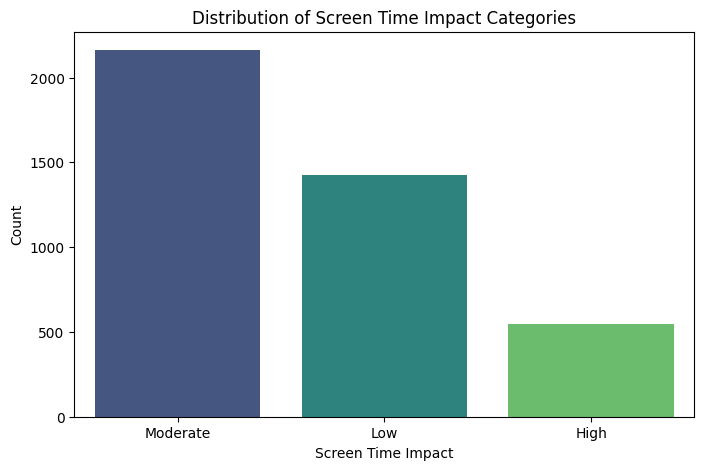

In [77]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,x='Screen_Time_Impact', hue='Screen_Time_Impact', 
    palette='viridis',legend=False  
)
plt.title("Distribution of Screen Time Impact Categories")
plt.xlabel("Screen Time Impact")
plt.ylabel("Count")
plt.show()

In [78]:
df['Academic_Physical_Relation'] = df['Impact_on_Academics'].astype(str) + "_" + df['Physical_Activity_Level'].astype(str)
df['Academic_Physical_Relation']

0       0_1
1       1_2
2       1_0
3       1_1
4       0_0
       ... 
4199    0_0
4200    1_0
4201    1_0
4202    1_0
4203    1_2
Name: Academic_Physical_Relation, Length: 4134, dtype: object

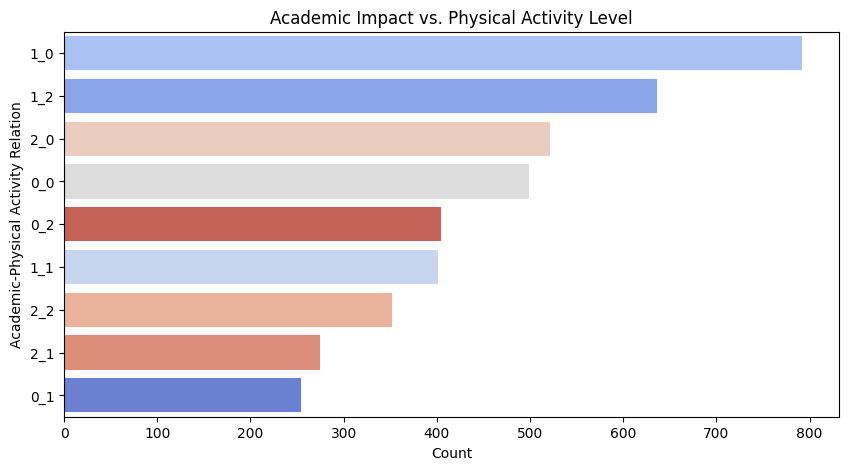

In [79]:
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df,y='Academic_Physical_Relation',order=df['Academic_Physical_Relation'].value_counts().index,hue='Academic_Physical_Relation',
    palette='coolwarm',legend=False)
plt.title("Academic Impact vs. Physical Activity Level")
plt.xlabel("Count")
plt.ylabel("Academic-Physical Activity Relation")
plt.show()

In [80]:
df['Emotional_Stability_Score'] = df['Emotional_Response_To_No_Device'].astype(int) + df['Stress_Levels'].astype(int)
df['Emotional_Stability_Score']

0       3
1       2
2       5
3       0
4       5
       ..
4199    3
4200    2
4201    1
4202    1
4203    4
Name: Emotional_Stability_Score, Length: 4134, dtype: int64

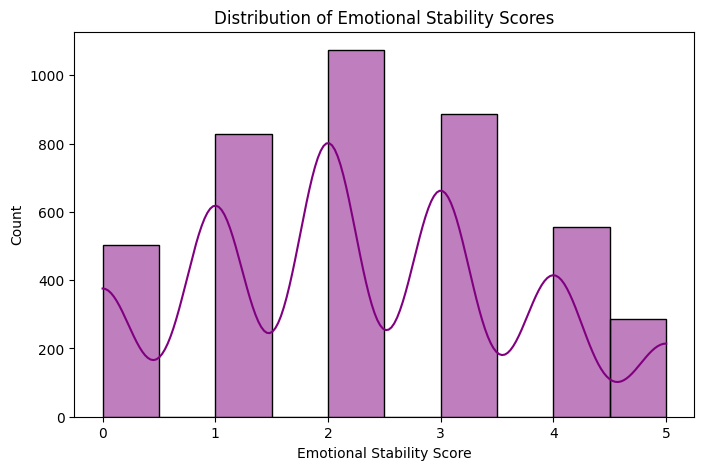

In [81]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Emotional_Stability_Score'], bins=10, kde=True, color='purple')
plt.title("Distribution of Emotional Stability Scores")
plt.xlabel("Emotional Stability Score")
plt.ylabel("Count")
plt.show()

In [82]:
df['Social_Academic_Relation'] = df['Social_Interactions_Preference'].astype(str) + "_" + df['Impact_on_Academics'].astype(str)
df['Social_Academic_Relation']

0       1_0
1       2_1
2       1_1
3       0_1
4       0_0
       ... 
4199    0_0
4200    1_1
4201    0_1
4202    1_1
4203    0_1
Name: Social_Academic_Relation, Length: 4134, dtype: object

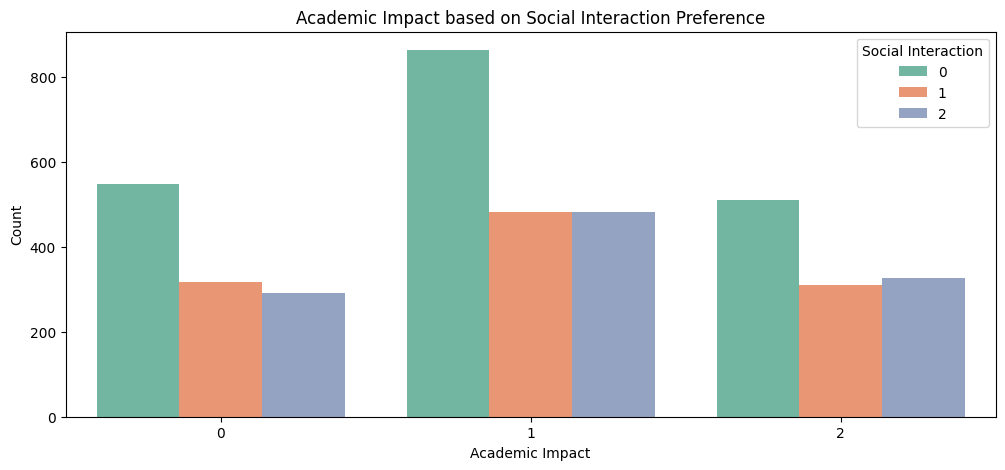

In [83]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Impact_on_Academics', hue='Social_Interactions_Preference', palette='Set2')
plt.title("Academic Impact based on Social Interaction Preference")
plt.xlabel("Academic Impact")
plt.ylabel("Count")
plt.legend(title="Social Interaction")
plt.show()

In [84]:
category_mappings = { 
    'Preferred_Activity': {0: 'Educational Apps', 1: 'Gaming', 2: 'Video Watching', 3: 'Youtube Kids'},
    'Emotional_Response_To_No_Device': {0: 'Distressed', 1: 'Irritable', 2: 'Neutral', 3: 'Unbothered'},
    'Impact_on_Academics': {0: 'high', 1: 'low', 2: 'moderate'},
    'Impact_on_Sleep': {0: 'Disrupted', 1: 'Improved', 2: 'Neutral'},
    'Physical_Activity_Level': {0: 'High', 1: 'Moderate', 2: 'low'},
    'Social_Interactions_Preference': {0: 'Balanced', 1: 'Offline', 2: 'Online'},
    'Parent_Screen_Time_Habits': {0: 'high', 1: 'low', 2: 'moderate'},
    'Sibling_Influence': {1: 'negative', 2: 'neutral', 3: 'positive'},
    'Cognitive_Impact': {0: 'declined', 1: 'improved', 3: 'neutral'},
    'Emotional_Regulation_Use': {0: 'frequent', 2: 'occasional', 3: 'rare'},
    'Parental_Monitoring_Level': {0: 'High', 1: 'Low', 2: 'Moderate'},
    'Gender': {0: 'Female', 1: 'Male'},
    'Teacher_Feedback': {
        0: 'No feedback provided due to missing data.',
        1: 'Student is maintaining a satisfactory performance in class but shows room for improvement in creativity. Moderate screen time could be better managed to encourage more creative thinking.',
        2: 'Student is performing well in class and demonstrates excellent creativity. The balanced screen time seems to contribute positively to their engagement and imagination.',
        3: "Student's high screen time is impacting classroom performance and limiting creative expression.",
        4: "Student's high screen time is impacting classroom performance and limiting creative expression. Reducing screen time could significantly enhance their focus and originality."
    },
    'Participation_in_Extracurricular_Activities': {0: 'high', 1: 'low', 2: 'moderate'},
    'Parental_Involvement_in_Education': {0: 'high', 1: 'low', 2: 'moderate'},
    'Peer_Relationship_Quality': {0: 'average', 1: 'excellent', 2: 'good', 3: 'poor'},
    'Stress_Levels': {0: 'high', 1: 'low', 2: 'moderate'},
    'Favorite_Subject': {0: 'art', 1: 'literature', 2: 'math', 3: 'physical education', 4: 'science'}
}

for col, mapping in category_mappings.items():
    df[col] = df[col].map(mapping)

print(df.head())

     Child_ID   Age  Daily_Screen_Time_Hours Preferred_Activity  \
0  Child_3531  11.0                      5.7       Youtube Kids   
1  Child_3675   8.0                      1.8   Educational Apps   
2  Child_1295  12.0                      3.5     Video Watching   
3   Child_316  10.0                      0.8             Gaming   
4     Unknown   6.0                      4.6             Gaming   

   Device_Dependency_Score Emotional_Response_To_No_Device  \
0                     10.0                       Irritable   
1                      6.0                       Irritable   
2                      8.0                      Unbothered   
3                     10.0                      Distressed   
4                      1.0                      Unbothered   

   Parental_Control_Strictness Impact_on_Academics Impact_on_Sleep  \
0                          3.0                high         Neutral   
1                          4.0                 low        Improved   
2             

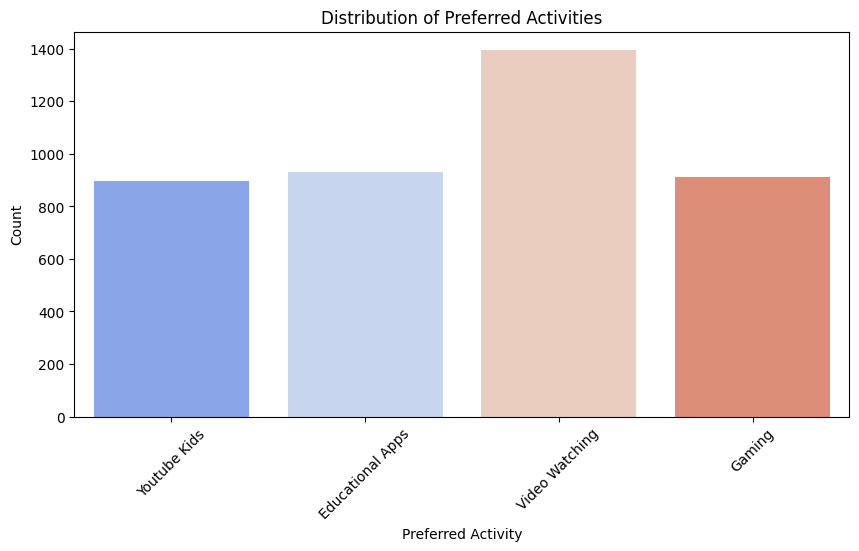

In [90]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df,x='Preferred_Activity',hue='Preferred_Activity', palette="coolwarm",legend=False  
)
plt.xlabel('Preferred Activity')
plt.ylabel('Count')
plt.title('Distribution of Preferred Activities')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Histogram of Daily Screen Time')

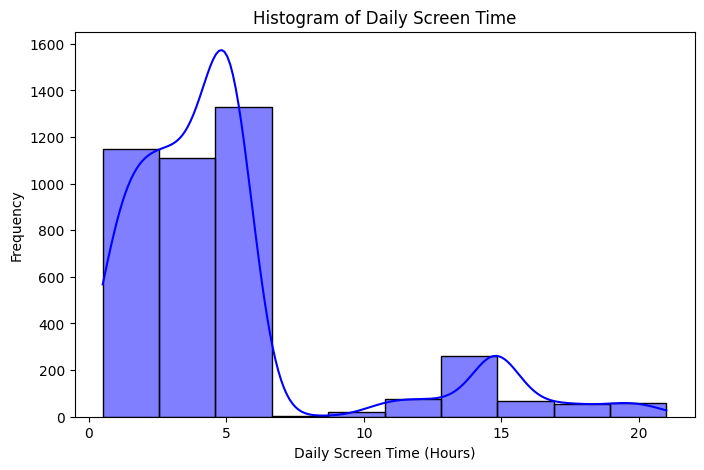

In [86]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Daily_Screen_Time_Hours'], bins=10, kde=True, color='blue')
plt.xlabel('Daily Screen Time (Hours)')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Screen Time')

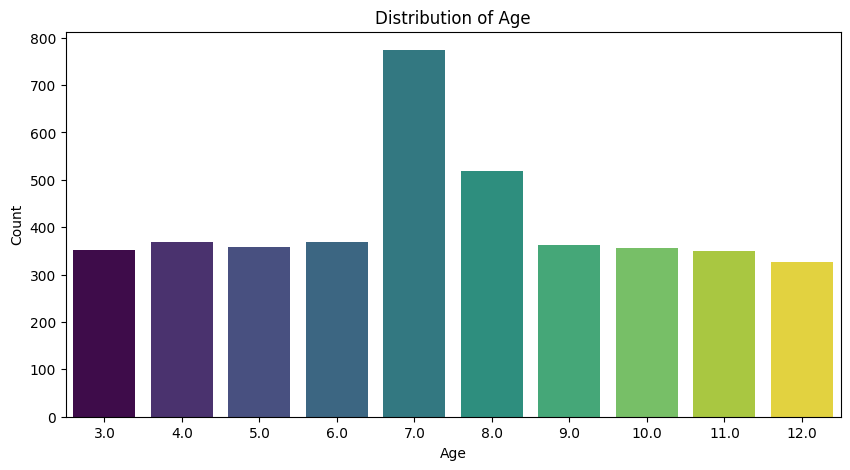

In [91]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df,x='Age',hue='Age', palette="viridis",legend=False 
)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

Text(0.5, 1.0, 'Heatmap of Feature Correlations')

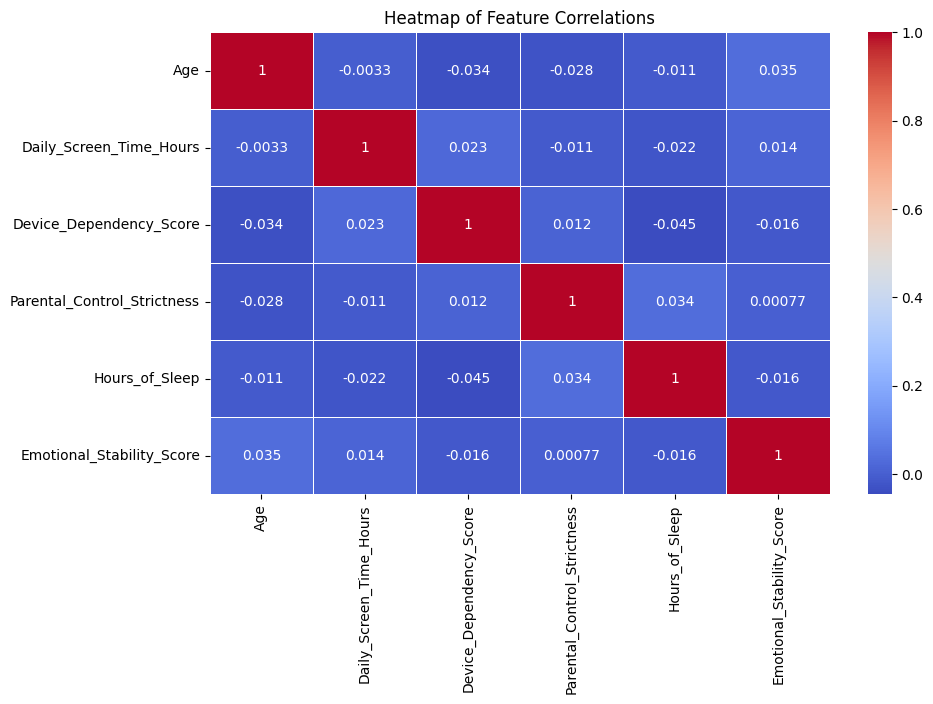

In [88]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')

Text(0.5, 1.0, 'Distribution of Emotional Response to No Device')

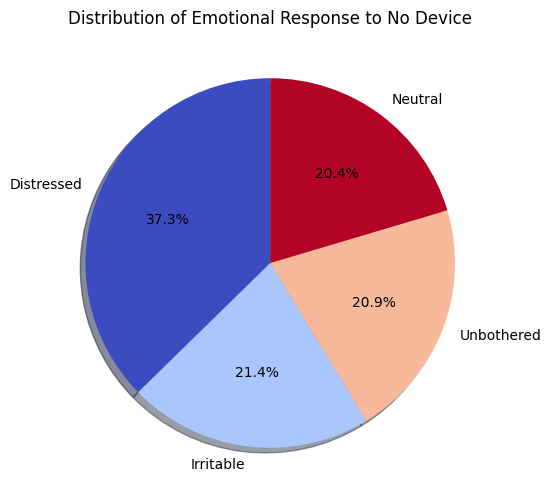

In [89]:
plt.figure(figsize=(6, 6))
df['Emotional_Response_To_No_Device'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm', shadow=True)
plt.ylabel('')
plt.title('Distribution of Emotional Response to No Device')